# PREDICTING DIABETES RISK
     PROBLEM:Identifying individuals at risk of developing diabetes 
     SOLUTION:Predicting Diabetes based on medical data like glucose levels, BMI, age, and family history.
     IMPACT:Helps doctors prioritize patients for early intervention, reducing healthcare costs and doctors getting enough time to control diabetes

## importing the packages

In [56]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as pyp 


## importing the health data

In [58]:
Health_data=pd.read_csv("C:/Users/Bachelor_001/OneDrive/Desktop/PD/diabetes.csv")
pd.set_option("display.max_rows",None)
Health_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## investigating my data

In [60]:
Health_data.info()
Health_data.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No missing values in the data

In [62]:
Health_data.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Investigating Pregnancies

In [64]:
Health_data['Pregnancies'].info()
Health_data['Pregnancies'].head()
Health_data['Pregnancies'].unique()


<class 'pandas.core.series.Series'>
RangeIndex: 768 entries, 0 to 767
Series name: Pregnancies
Non-Null Count  Dtype
--------------  -----
768 non-null    int64
dtypes: int64(1)
memory usage: 6.1 KB


array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

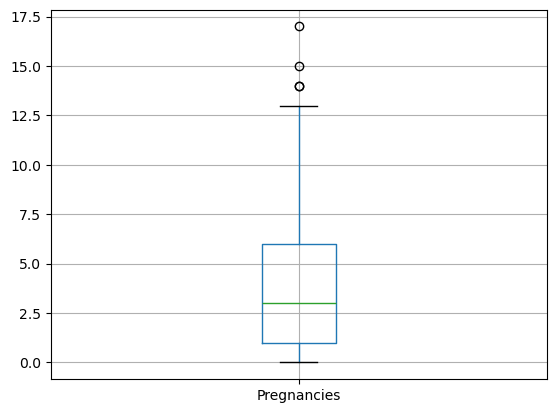

In [66]:
Health_data.boxplot(column='Pregnancies')
pyp.show()

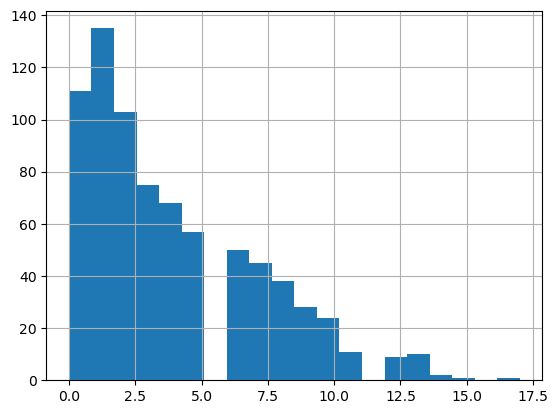

In [68]:
Health_data['Pregnancies'].hist(bins=20)
pyp.show()

## Dealing with Outliers

In [156]:
Health_data['Pregnancies']=np.log(Health_data['Pregnancies'])

C:\Users\Bachelor_001\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


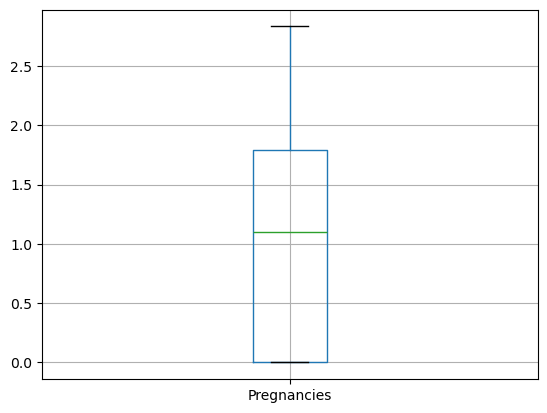

In [158]:
Health_data.boxplot(column='Pregnancies')
pyp.show()

## investigating Glucose

<class 'pandas.core.series.Series'>
RangeIndex: 768 entries, 0 to 767
Series name: Glucose
Non-Null Count  Dtype
--------------  -----
768 non-null    int64
dtypes: int64(1)
memory usage: 6.1 KB


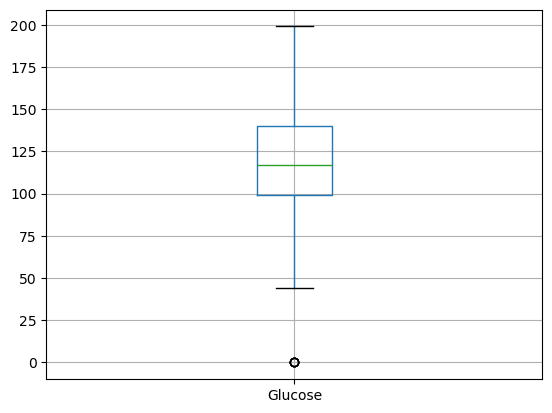

In [72]:
Health_data['Glucose'].info()
Health_data['Glucose'].unique()
(Health_data['Glucose']==0).sum()
Health_data.boxplot(column='Glucose')
pyp.show()

Glucose has one outlier

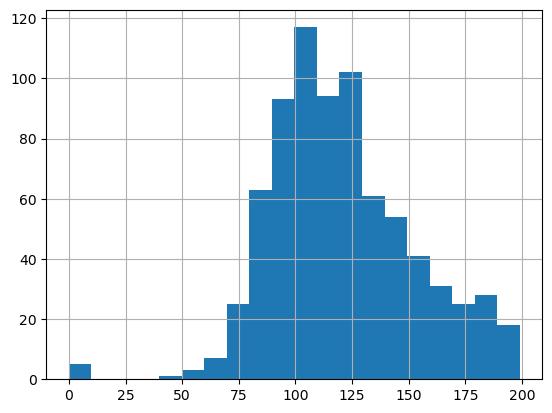

In [74]:
Health_data['Glucose'].hist(bins=20)
pyp.show()

positively skewed distribution

In [166]:
Health_data['Glucose']=np.log(Health_data['Glucose'])


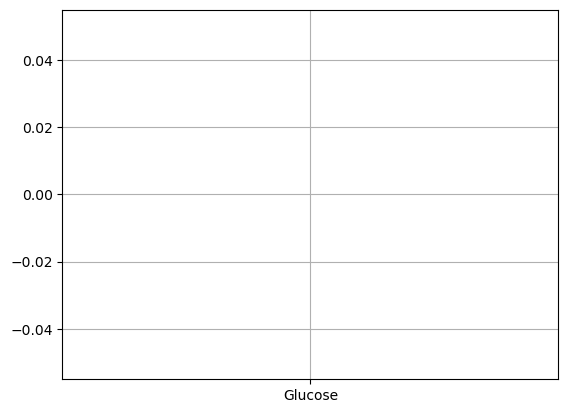

In [172]:
Health_data.boxplot(column='Glucose')
pyp.show()

In [170]:
Health_data['Glucose']=np.log(Health_data['Glucose'])

C:\Users\Bachelor_001\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [176]:
Health_data.boxplot(column='Glucose')


<Axes: >

## Investigating BloodPressure

<class 'pandas.core.series.Series'>
RangeIndex: 768 entries, 0 to 767
Series name: BloodPressure
Non-Null Count  Dtype
--------------  -----
768 non-null    int64
dtypes: int64(1)
memory usage: 6.1 KB


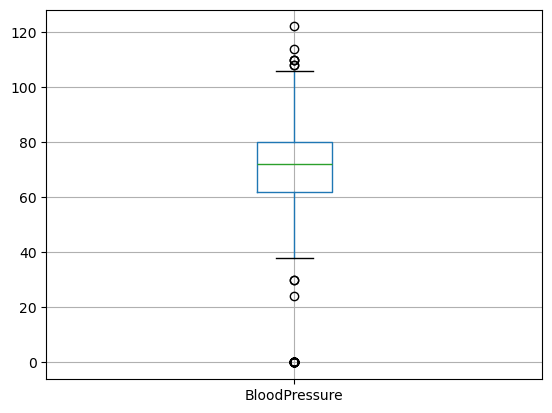

In [76]:
Health_data['BloodPressure'].info()
Health_data['BloodPressure'].unique()
Health_data['BloodPressure'].isna().sum()
Health_data.boxplot(column = 'BloodPressure')
pyp.show()

Blood pressure has 7 outliers

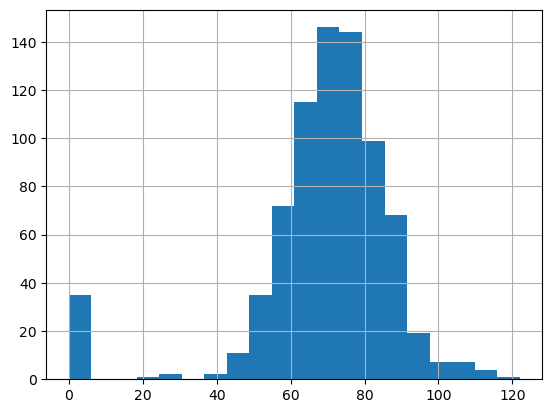

In [78]:
Health_data['BloodPressure'].hist(bins=20)
pyp.show()

In [80]:
Health_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Investigating SkinThickness

In [82]:
Health_data['SkinThickness'].info()
Health_data['SkinThickness'].unique()
(Health_data['SkinThickness']==0).sum()

<class 'pandas.core.series.Series'>
RangeIndex: 768 entries, 0 to 767
Series name: SkinThickness
Non-Null Count  Dtype
--------------  -----
768 non-null    int64
dtypes: int64(1)
memory usage: 6.1 KB


227

Dropping SkinThickness

In [84]:
Health_data=Health_data.drop(['SkinThickness'],axis='columns')


In [86]:
Health_data.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1


## Investigating Insulin

In [88]:
Health_data['Insulin'].info()
Health_data['Insulin'].unique()
(Health_data['Insulin']==0).sum()

<class 'pandas.core.series.Series'>
RangeIndex: 768 entries, 0 to 767
Series name: Insulin
Non-Null Count  Dtype
--------------  -----
768 non-null    int64
dtypes: int64(1)
memory usage: 6.1 KB


374

Droppping Insulin

In [90]:
Health_data=Health_data.drop(['Insulin'],axis='columns')

In [92]:
Health_data.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,33.6,0.627,50,1
1,1,85,66,26.6,0.351,31,0
2,8,183,64,23.3,0.672,32,1
3,1,89,66,28.1,0.167,21,0
4,0,137,40,43.1,2.288,33,1


In [96]:
#number_of_zeros_insulin=(Health_data['Insulin']==0).sum()
#number_of_zeros_insulin

Too many zeros in insulin wont affect the our analysis if dropped

## investigating BMI

<class 'pandas.core.series.Series'>
RangeIndex: 768 entries, 0 to 767
Series name: BMI
Non-Null Count  Dtype  
--------------  -----  
768 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


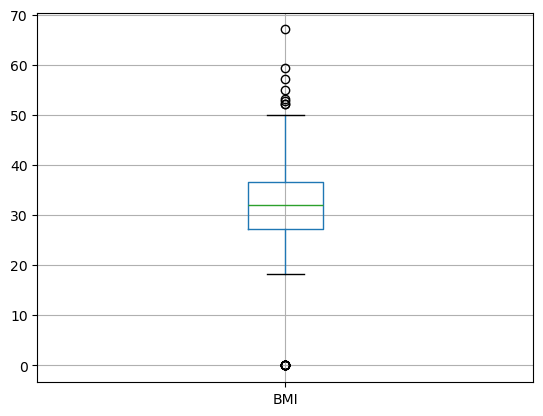

In [98]:
Health_data['BMI'].info()
Health_data['BMI'].unique()
Health_data.boxplot(column='BMI')
pyp.show()


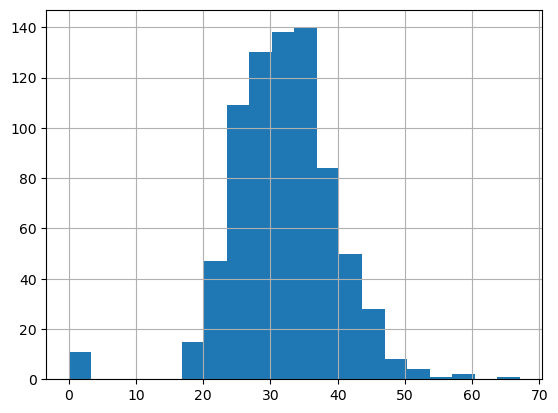

In [100]:
Health_data['BMI'].hist(bins=20)
pyp.show()

Skewed distribution

## Investigating DiabetesPedigreeFunction

<class 'pandas.core.series.Series'>
RangeIndex: 768 entries, 0 to 767
Series name: DiabetesPedigreeFunction
Non-Null Count  Dtype  
--------------  -----  
768 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


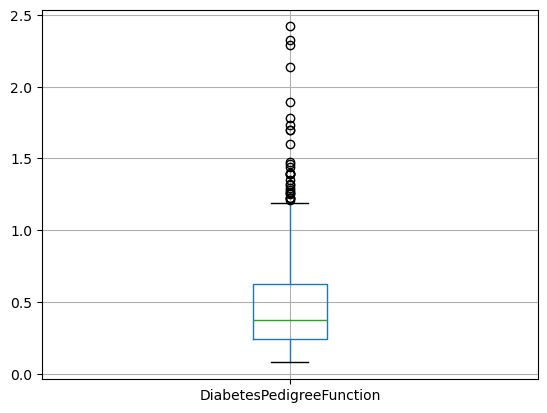

In [102]:
Health_data['DiabetesPedigreeFunction'].info()
Health_data['DiabetesPedigreeFunction'].unique()
Health_data.boxplot(column='DiabetesPedigreeFunction')
pyp.show()

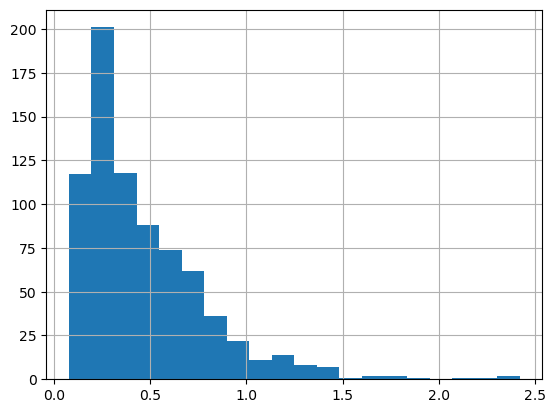

In [104]:
Health_data['DiabetesPedigreeFunction'].hist(bins=20)
pyp.show()

In [178]:
Health_data['DiabetesPedigreeFunction']=np.log(Health_data['DiabetesPedigreeFunction'])



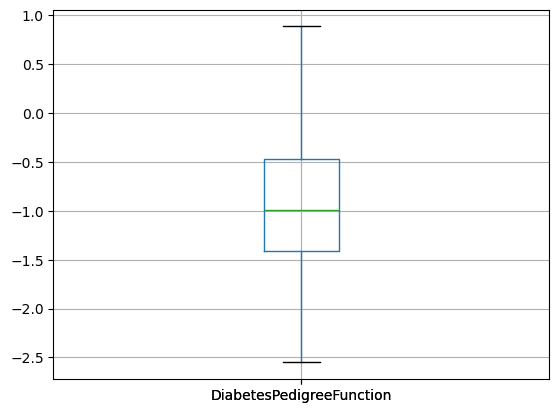

In [180]:
Health_data.boxplot(column='DiabetesPedigreeFunction')
pyp.show()

In [106]:
Health_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Investigating Age

In [108]:
Health_data['Age'].info()
Health_data['Age'].unique()


<class 'pandas.core.series.Series'>
RangeIndex: 768 entries, 0 to 767
Series name: Age
Non-Null Count  Dtype
--------------  -----
768 non-null    int64
dtypes: int64(1)
memory usage: 6.1 KB


array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68], dtype=int64)

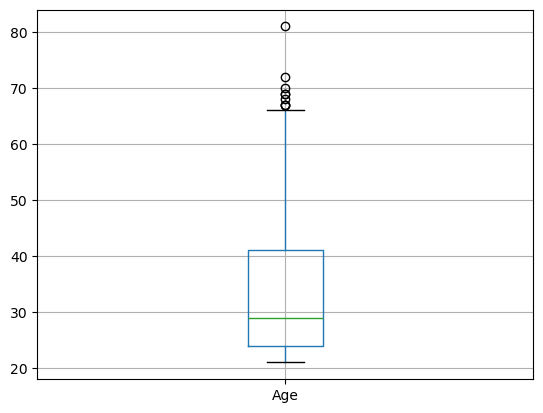

In [110]:
Health_data.boxplot(column='Age')
pyp.show()

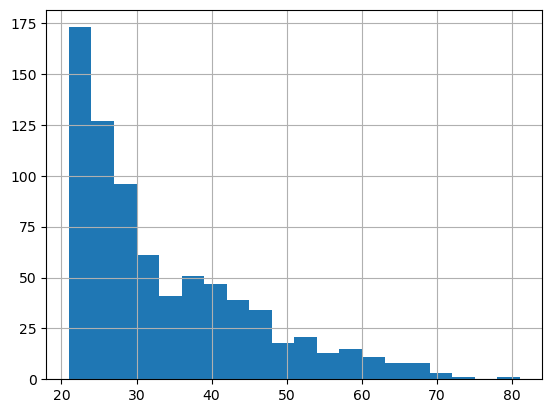

In [112]:
Health_data['Age'].hist(bins=20)
pyp.show()

Replacing 0 with meadian in Glucose

In [182]:
Health_data['Age']=np.log(Health_data['Age'])

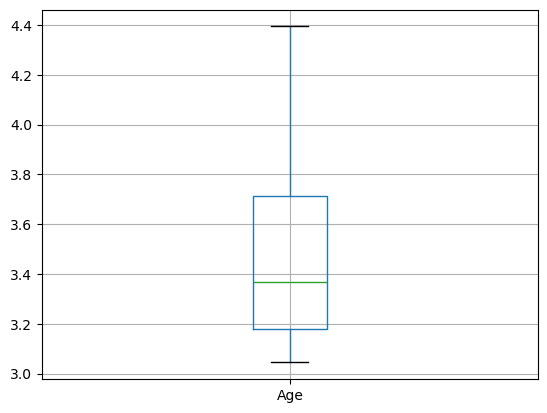

In [184]:
Health_data.boxplot(column='Age')
pyp.show()

In [114]:
Health_data['Glucose']=Health_data['Glucose'].replace([0,Health_data['Glucose'].median()])

C:\Users\Bachelor_001\AppData\Local\Temp\ipykernel_16592\2060270677.py:1: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  Health_data['Glucose']=Health_data['Glucose'].replace([0,Health_data['Glucose'].median()])


In [116]:
(Health_data['Glucose']==0).sum()

0

In [118]:
Health_data.sample(20)

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
123,5,132,80,26.8,0.186,69,0
747,1,81,74,46.3,1.096,32,0
347,3,116,0,23.5,0.187,23,0
651,1,91,60,33.8,0.466,27,0
735,4,95,60,35.4,0.284,28,0
281,10,129,76,35.9,0.280,39,0
110,3,171,72,33.3,0.199,24,1
8,2,197,70,30.5,0.158,53,1
696,3,169,74,29.9,0.268,31,1
244,2,146,76,38.2,0.329,29,0


In [120]:
Health_data['BloodPressure']=Health_data['BloodPressure'].replace([0,Health_data['BloodPressure'].median()])

C:\Users\Bachelor_001\AppData\Local\Temp\ipykernel_16592\1106200303.py:1: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  Health_data['BloodPressure']=Health_data['BloodPressure'].replace([0,Health_data['BloodPressure'].median()])


In [122]:
(Health_data['BloodPressure']==0).sum()

0

In [124]:
Health_data['BMI']=Health_data['BMI'].replace([0,Health_data['BMI'].median()])

C:\Users\Bachelor_001\AppData\Local\Temp\ipykernel_16592\2997554782.py:1: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  Health_data['BMI']=Health_data['BMI'].replace([0,Health_data['BMI'].median()])


In [126]:
(Health_data['BMI']==0).sum()

0

In [130]:
Health_data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [132]:
Health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   BMI                       768 non-null    float64
 4   DiabetesPedigreeFunction  768 non-null    float64
 5   Age                       768 non-null    int64  
 6   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 42.1 KB


## Investigating Outcome

In [134]:
Health_data['Outcome'].info()
Health_data['Outcome'].unique()
Health_data['Outcome']=Health_data['Outcome'].astype('category')
Health_data['Outcome'].info()
Health_data['Outcome'].unique()

<class 'pandas.core.series.Series'>
RangeIndex: 768 entries, 0 to 767
Series name: Outcome
Non-Null Count  Dtype
--------------  -----
768 non-null    int64
dtypes: int64(1)
memory usage: 6.1 KB
<class 'pandas.core.series.Series'>
RangeIndex: 768 entries, 0 to 767
Series name: Outcome
Non-Null Count  Dtype   
--------------  -----   
768 non-null    category
dtypes: category(1)
memory usage: 1.0 KB


[1, 0]
Categories (2, int64): [0, 1]

## Assighning values

In [136]:
y=Health_data['Outcome']
x=Health_data.drop('Outcome',axis='columns')

In [144]:
import sklearn
dir(sklearn)
import mglearn
dir(mglearn)

['ReBl',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'cm2',
 'cm3',
 'datasets',
 'discrete_scatter',
 'plot_2d_separator',
 'plot_agglomerative',
 'plot_animal_tree',
 'plot_cross_validation',
 'plot_dbscan',
 'plot_decomposition',
 'plot_grid_search',
 'plot_helpers',
 'plot_improper_preprocessing',
 'plot_interactive_tree',
 'plot_kmeans',
 'plot_kneighbors_regularization',
 'plot_knn_classification',
 'plot_knn_regression',
 'plot_linear_regression',
 'plot_linear_svc_regularization',
 'plot_metrics',
 'plot_nmf',
 'plot_nn_graphs',
 'plot_pca',
 'plot_rbf_svm_parameters',
 'plot_ridge',
 'plot_scaling',
 'plot_tree_nonmonotonous',
 'plots',
 'tools']

In [146]:
dir(sklearn)


['_BUILT_WITH_MESON',
 '__SKLEARN_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__check_build',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_config',
 '_distributor_init',
 '_isotonic',
 '_loss',
 'base',
 'clone',
 'cluster',
 'config_context',
 'datasets',
 'decomposition',
 'exceptions',
 'externals',
 'feature_extraction',
 'get_config',
 'isotonic',
 'linear_model',
 'logger',
 'logging',
 'manifold',
 'metrics',
 'model_selection',
 'neighbors',
 'os',
 'preprocessing',
 'random',
 'set_config',
 'setup_module',
 'show_versions',
 'svm',
 'sys',
 'tree',
 'utils']

## Testing and training

In [228]:
dir(sklearn.linear_model)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
logistic_reg=LogisticRegression()
logistic_reg.fit(x_train,y_train)



LogisticRegression()

Testing the rand score

In [224]:
print('The R2 of train is :{:.2f}'.format(logistic_reg.score(x_train,y_train)))

The R2 of train is :0.76


In [226]:
print('The R2 of test is :{:.2f}'.format(logistic_reg.score(x_test,y_test)))

The R2 of test is :0.78


this is a good model(78% accuracy is good)

In [ ]:
Health_data.column

In [154]:
logistic_reg.predict(x_test)

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [ ]:
logistic_reg.predict([1,